Student Name: Dáithí Horan
Student ID: 15162818

# Outline of Task
### Task 1
Download the files:
* Lab 3 - Clustering and Manifold Learning.ipynb example notebook for this e-tivity
* iris_nolabels.csv the dataset used in the example notebook
* loans_train_prepared.csv the dataset to use in Tasks 2 and 3

### Task 2
1. Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 
2. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. 
3. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.
4. Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

### Import Modules

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.preprocessing import StandardScaler

### Import Dataset 

In [35]:
df = pd.read_csv("./loans_train_prepared-1.csv")
#df_original = df.copy()
#data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (614, 16)


In [36]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [37]:
 df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

In [38]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

### Rescale the data

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)

std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [40]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [43]:
sse = []
for k in range(2,20):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    sse.append(model.inertia_)

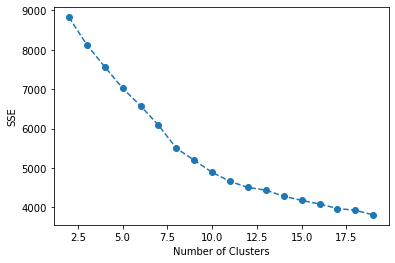

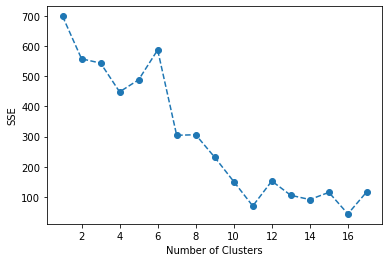

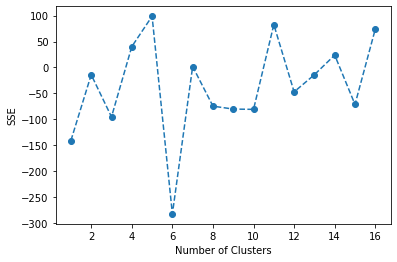

In [61]:
plt.plot(range(2,20), sse,'o--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Find the rate of change 
diff = []
for e in range(len(sse)-1):
    diff.append(-sse[e+1] + sse[e])
plt.plot(range(1,18), diff,'o--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

diff2 = []
for e in range(len(diff)-1):
    diff2.append(diff[e+1] - diff[e])
plt.plot(range(1,17), diff2,'o--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

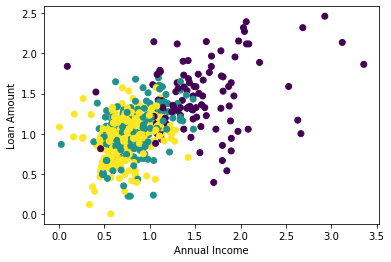

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)
y_pred = kmeans.predict(df)
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], c=y_pred)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

In [32]:
from sklearn.manifold import MDS, TSNE

stress = []
for i in range(1, 12):
    mds_sklearn = MDS(n_components=i)
    # Apply MDS
    pts = mds_sklearn.fit_transform(df_scaled)
    # Retrieve the stress value
    stress.append(mds_sklearn.stress_)

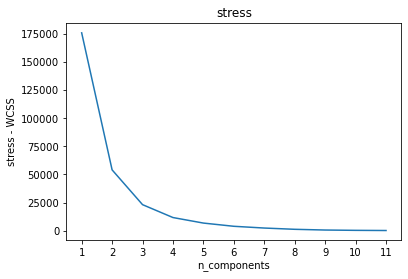

In [33]:
# Plot stress vs. n_components    
plt.plot(range(1, 12), stress)
plt.xticks(range(1, 12, 1))
plt.title('stress')
plt.xlabel('n_components')
plt.ylabel('stress - WCSS')
plt.show()

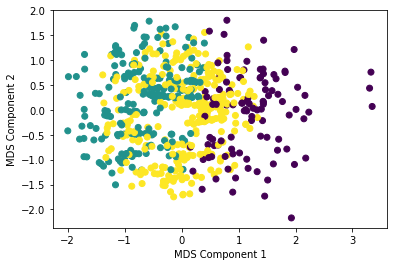

In [46]:
# MDS visualization
mds = MDS(n_components=3)
df_mds = mds.fit_transform(df)
plt.scatter(df_mds[:, 0], df_mds[:, 1], c=y_pred)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()

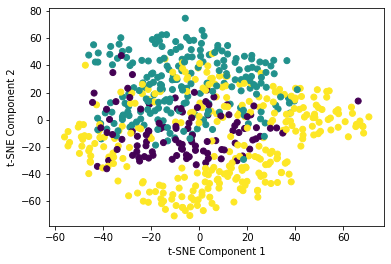

In [45]:
# t-SNE visualization
tsne = TSNE(n_components=3, perplexity=30)
df_tsne = tsne.fit_transform(df)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=y_pred)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()